In [1]:
import pandas as pd

In [2]:
def show_res(file: str):
  df = pd.read_csv(file)

  true = 0
  total = 0
  for _, row in df.iterrows():
    total += 1
    if row["exact_match"] == 1:
      true += 1
      
  print(true,total)
  print(true/total)

  prob_nsw_dict = {}

  for _, row in df.iterrows():
      tag = row["test_tag"].strip()
      if tag not in prob_nsw_dict.keys():
        prob_nsw_dict[tag] = {"true": 0,
                              "total": 0}
      prob_nsw_dict[tag]["total"] += 1
      if row["exact_match"] == 1:
        prob_nsw_dict[tag]["true"] += 1
        
  import matplotlib.pyplot as plt

  # Compute accuracy for each tag
  tag_accuracy = []
  for tag, values in prob_nsw_dict.items():
      accuracy = values["true"] / values["total"] if values["total"] > 0 else 0
      tag_accuracy.append((tag, accuracy))

  # Sort by descending accuracy
  tag_accuracy.sort(key=lambda x: x[1], reverse=True)

  # Unpack
  tag_names, accuracies = zip(*tag_accuracy)

  # Plot
  plt.figure(figsize=(12, 6))
  bars = plt.bar(tag_names, accuracies, color='skyblue')
  plt.xlabel("NSW Type (Tag)")
  plt.ylabel("Accuracy")
  plt.title("Accuracy per NSW Type (Descending)")
  plt.ylim(0, 1.05)

  # Add percentage on top of bars
  for bar, acc in zip(bars, accuracies):
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2.0, yval + 0.02, f"{acc:.2%}", ha='center', va='bottom')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()

799 1191
0.670864819479429


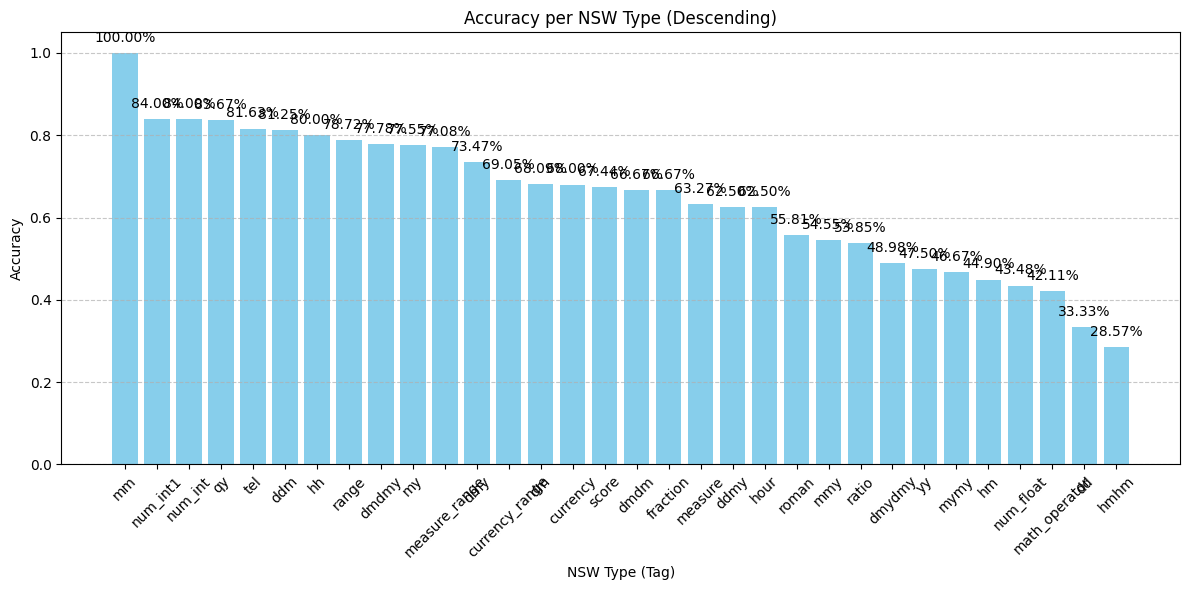

In [4]:
import pandas as pd

file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-09/2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

# baseline

870 1191
0.7304785894206549


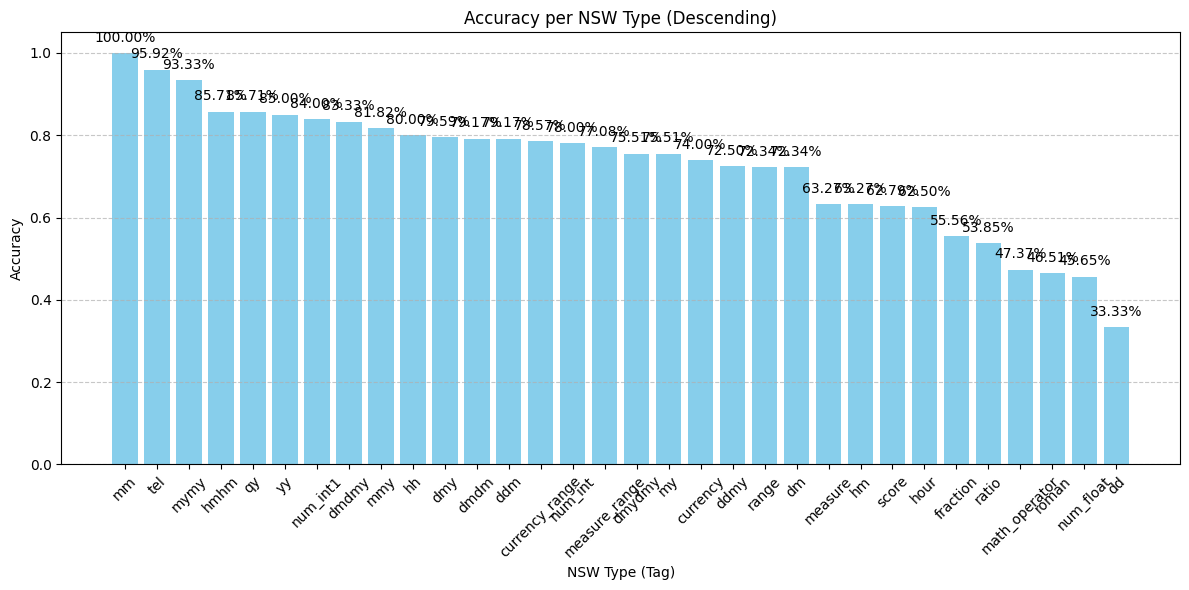

In [4]:
file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-09/2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

879 1191
0.7380352644836272


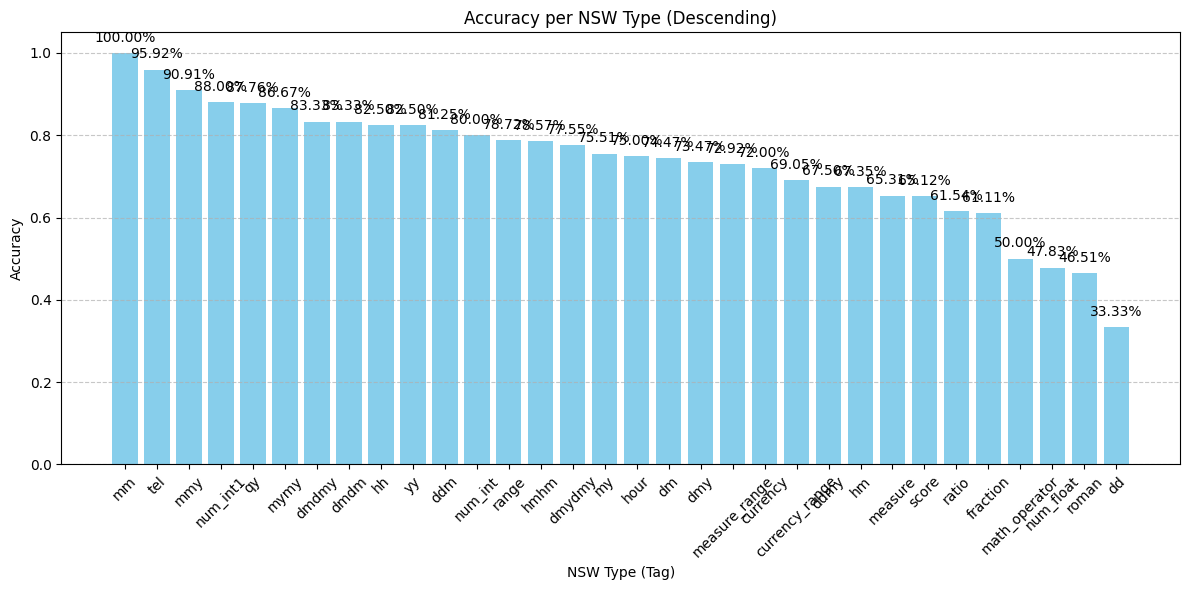

In [3]:
file = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-09/17:36:06_2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

820 1191
0.6884970612930311


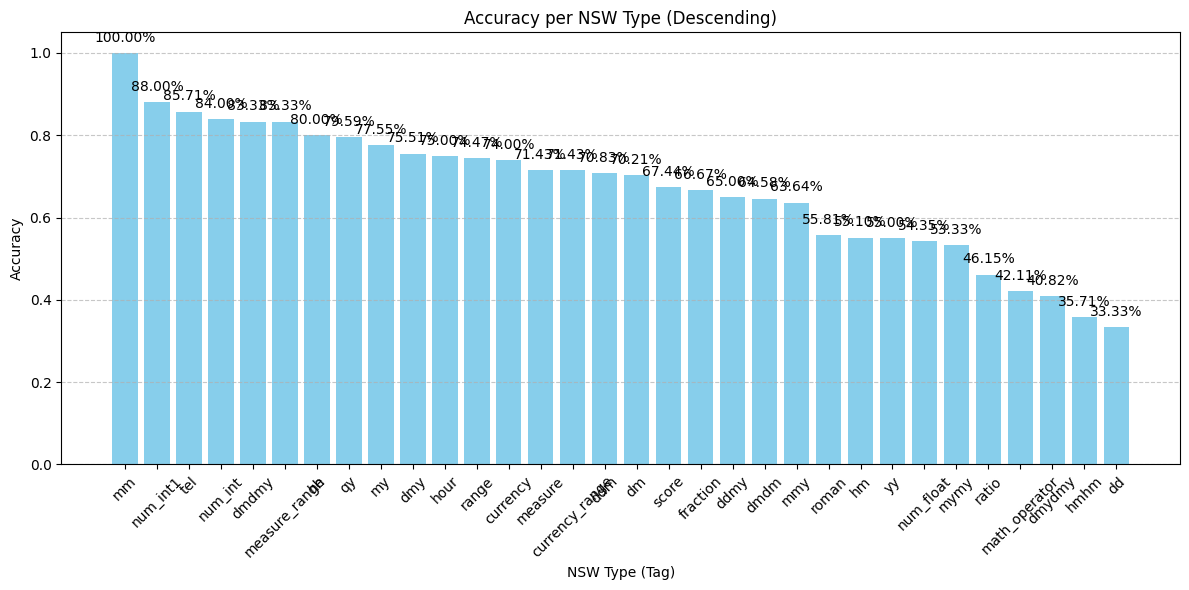

In [5]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-09/22:09:33_2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

794 1191
0.6666666666666666


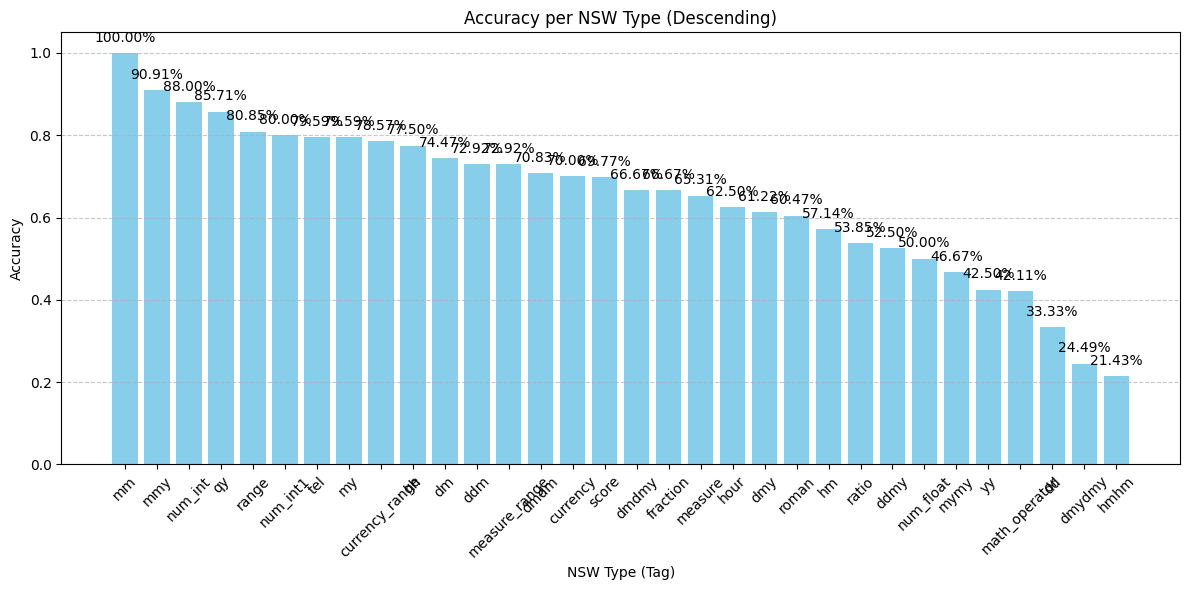

In [4]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-09/22:10:46_2025-06-07_vn-qwen2.5-3b-augmented-2025-06-07_1_eval.csv"
show_res(file)

828 1191
0.6952141057934509


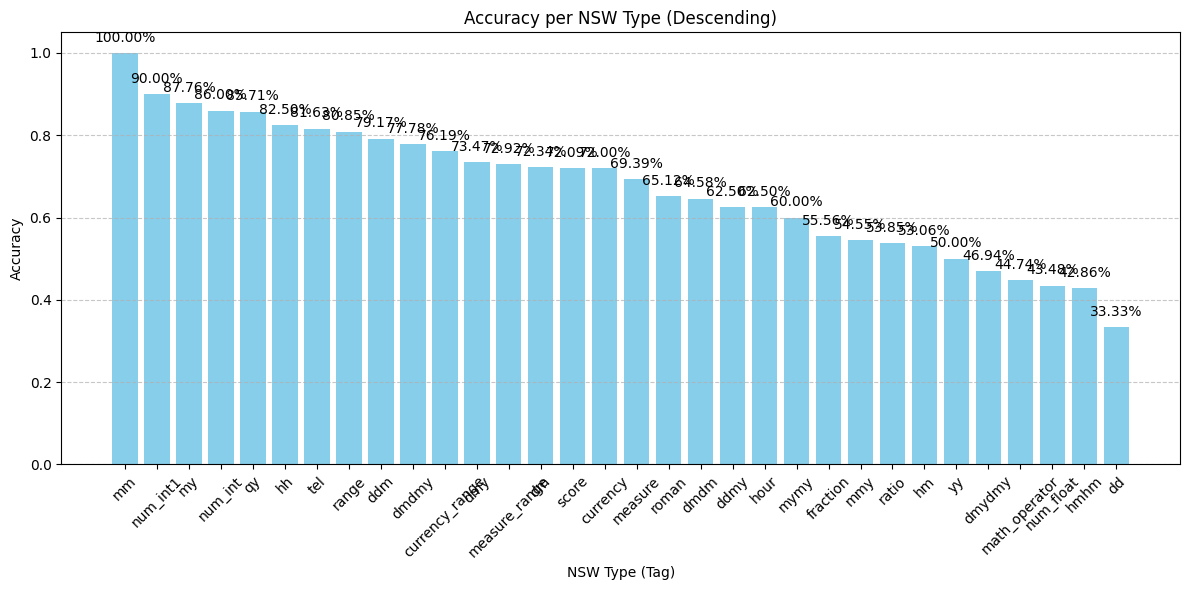

In [3]:
file = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-09/23:19:25_2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"
show_res(file)

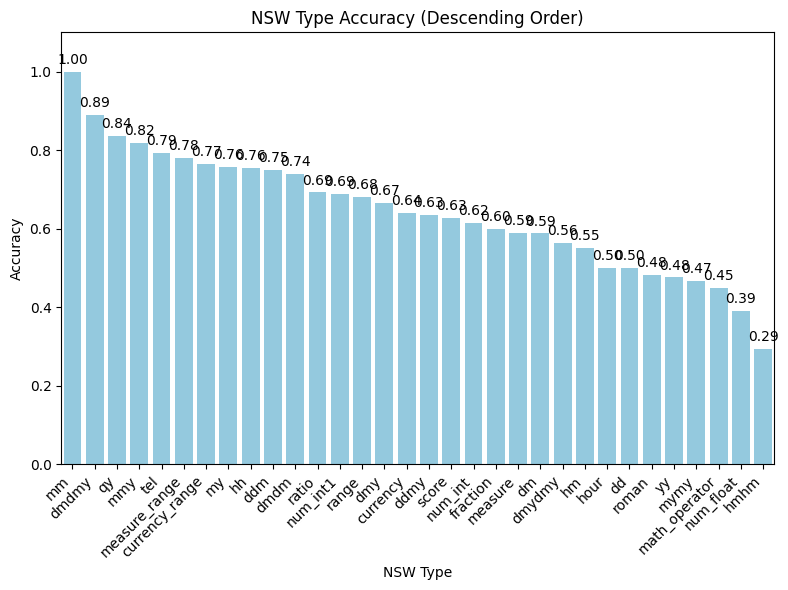

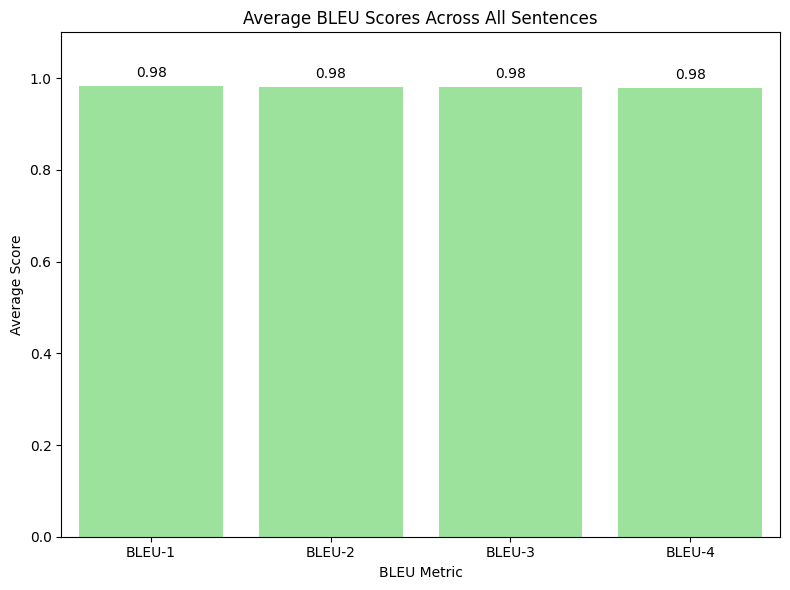


NSW Type Accuracy Statistics:
mm: 10/10 correct, Accuracy = 1.00
dmdmy: 16/18 correct, Accuracy = 0.89
qy: 41/49 correct, Accuracy = 0.84
mmy: 9/11 correct, Accuracy = 0.82
tel: 46/58 correct, Accuracy = 0.79
measure_range: 53/68 correct, Accuracy = 0.78
currency_range: 36/47 correct, Accuracy = 0.77
my: 56/74 correct, Accuracy = 0.76
hh: 37/49 correct, Accuracy = 0.76
ddm: 36/48 correct, Accuracy = 0.75
dmdm: 37/50 correct, Accuracy = 0.74
ratio: 9/13 correct, Accuracy = 0.69
num_int1: 100/145 correct, Accuracy = 0.69
range: 60/88 correct, Accuracy = 0.68
dmy: 50/75 correct, Accuracy = 0.67
currency: 50/78 correct, Accuracy = 0.64
ddmy: 26/41 correct, Accuracy = 0.63
score: 37/59 correct, Accuracy = 0.63
num_int: 561/911 correct, Accuracy = 0.62
fraction: 24/40 correct, Accuracy = 0.60
measure: 121/205 correct, Accuracy = 0.59
dm: 110/187 correct, Accuracy = 0.59
dmydmy: 31/55 correct, Accuracy = 0.56
hm: 32/58 correct, Accuracy = 0.55
hour: 5/10 correct, Accuracy = 0.50
dd: 2/4 corr

In [1]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/llm_inference/2025-06-13/16:52:25_2025-06-08_vn-qwen2.5-3b-augmented_batch144_lr2e-4-2025-06-08_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Convert BLEU scores to numeric
bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
for col in bleu_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total correct sentences
total_correct_sentences = df["exact_match"].sum()

# Compute BLEU averages across all sentences
bleu_averages = {f"BLEU-{i+1}": df[f"bleu{i+1}"].mean() for i in range(4)}

# Compute accuracy per NSW type
tag_scores = {}
tag_counts = {}
for nsw_dict in df["nsw_exact_match"]:
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)
        tag_counts.setdefault(tag, 0)
        tag_counts[tag] += 1

# Calculate accuracy for each tag
tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

# Convert to DataFrame for NSW accuracy plot
accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot NSW accuracy bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
plt.title("NSW Type Accuracy (Descending Order)")
plt.xlabel("NSW Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert BLEU averages to DataFrame for plot
bleu_df = pd.DataFrame.from_dict(bleu_averages, orient="index", columns=["Average BLEU"])

# Plot BLEU averages bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bleu_df.index, y=bleu_df["Average BLEU"], color="lightgreen")
plt.title("Average BLEU Scores Across All Sentences")
plt.xlabel("BLEU Metric")
plt.ylabel("Average Score")
plt.ylim(0, 1.1)
for i, v in enumerate(bleu_df["Average BLEU"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("bleu_averages_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Accuracy Statistics:")
for tag in accuracy_df.index:
    accuracy = tag_accuracies[tag]
    correct = sum(tag_scores[tag])
    total = tag_counts[tag]
    print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")

print("\nBLEU Score Averages:")
for bleu_metric, avg in bleu_averages.items():
    print(f"{bleu_metric}: {avg:.2f}")

print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")


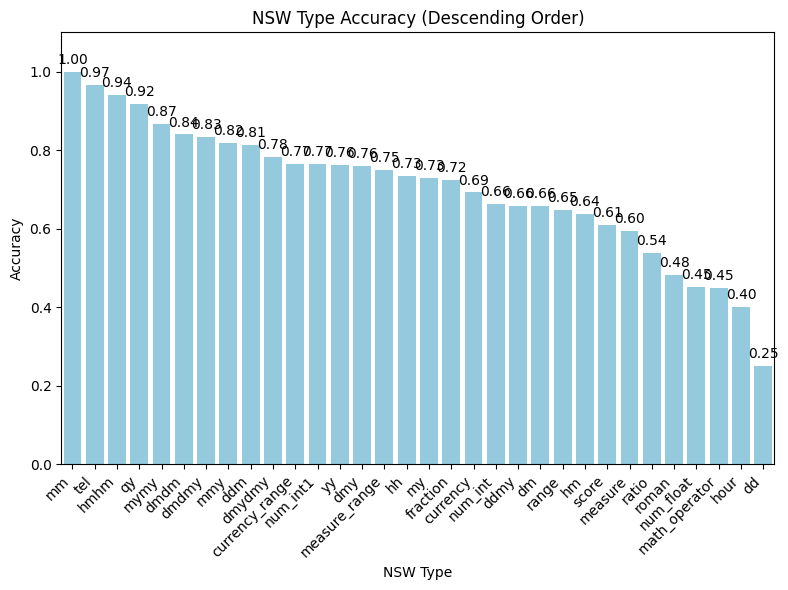

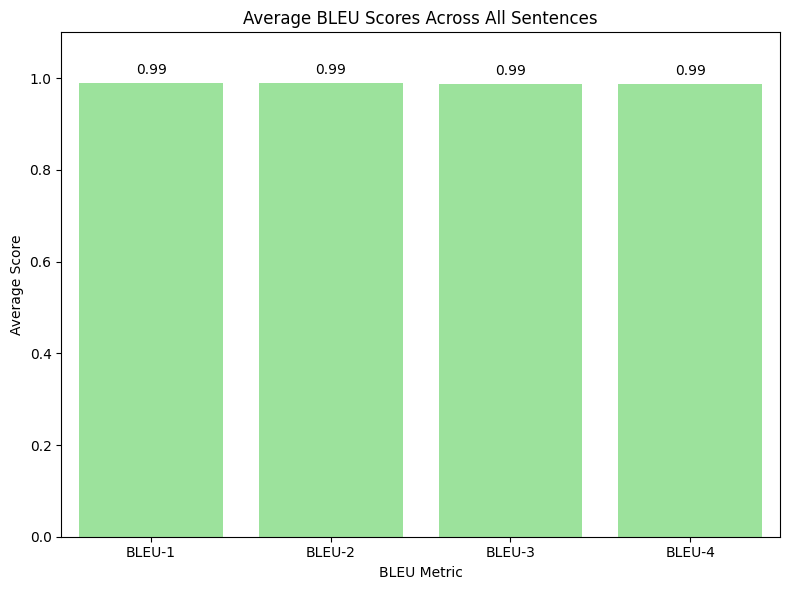


NSW Type Accuracy Statistics:
mm: 10/10 correct, Accuracy = 1.00
tel: 56/58 correct, Accuracy = 0.97
hmhm: 16/17 correct, Accuracy = 0.94
qy: 45/49 correct, Accuracy = 0.92
mymy: 13/15 correct, Accuracy = 0.87
dmdm: 42/50 correct, Accuracy = 0.84
dmdmy: 15/18 correct, Accuracy = 0.83
mmy: 9/11 correct, Accuracy = 0.82
ddm: 39/48 correct, Accuracy = 0.81
dmydmy: 43/55 correct, Accuracy = 0.78
currency_range: 36/47 correct, Accuracy = 0.77
num_int1: 111/145 correct, Accuracy = 0.77
yy: 32/42 correct, Accuracy = 0.76
dmy: 57/75 correct, Accuracy = 0.76
measure_range: 51/68 correct, Accuracy = 0.75
hh: 36/49 correct, Accuracy = 0.73
my: 54/74 correct, Accuracy = 0.73
fraction: 29/40 correct, Accuracy = 0.72
currency: 54/78 correct, Accuracy = 0.69
num_int: 605/911 correct, Accuracy = 0.66
ddmy: 27/41 correct, Accuracy = 0.66
dm: 123/187 correct, Accuracy = 0.66
range: 57/88 correct, Accuracy = 0.65
hm: 37/58 correct, Accuracy = 0.64
score: 36/59 correct, Accuracy = 0.61
measure: 122/205 c

In [3]:

import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV (replace with your actual file path)
csv_path = "/data/datnt3/text-normalization/data_storage/eval/hybrid_inference/2025-06-13/17:07:17_2025-06-07_vn-qwen2.5-3b-augmented-2025-06-07_1_eval.csv"  # Update to your CSV path
df = pd.read_csv(csv_path)

# Parse nsw_exact_match strings into dictionaries
df["nsw_exact_match"] = df["nsw_exact_match"].apply(ast.literal_eval)

# Convert BLEU scores to numeric
bleu_cols = ["bleu1", "bleu2", "bleu3", "bleu4"]
for col in bleu_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total correct sentences
total_correct_sentences = df["exact_match"].sum()

# Compute BLEU averages across all sentences
bleu_averages = {f"BLEU-{i+1}": df[f"bleu{i+1}"].mean() for i in range(4)}

# Compute accuracy per NSW type
tag_scores = {}
tag_counts = {}
for nsw_dict in df["nsw_exact_match"]:
    for nsw, [tag, score] in nsw_dict.items():
        tag_scores.setdefault(tag, []).append(score)
        tag_counts.setdefault(tag, 0)
        tag_counts[tag] += 1

# Calculate accuracy for each tag
tag_accuracies = {tag: sum(scores) / len(scores) for tag, scores in tag_scores.items()}

# Convert to DataFrame for NSW accuracy plot
accuracy_df = pd.DataFrame.from_dict(tag_accuracies, orient="index", columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plot NSW accuracy bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df.index, y=accuracy_df["Accuracy"], color="skyblue")
plt.title("NSW Type Accuracy (Descending Order)")
plt.xlabel("NSW Type")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("nsw_accuracy_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Convert BLEU averages to DataFrame for plot
bleu_df = pd.DataFrame.from_dict(bleu_averages, orient="index", columns=["Average BLEU"])

# Plot BLEU averages bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=bleu_df.index, y=bleu_df["Average BLEU"], color="lightgreen")
plt.title("Average BLEU Scores Across All Sentences")
plt.xlabel("BLEU Metric")
plt.ylabel("Average Score")
plt.ylim(0, 1.1)
for i, v in enumerate(bleu_df["Average BLEU"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center")
plt.tight_layout()
plt.savefig("bleu_averages_barchart.png", dpi=300, bbox_inches="tight")
plt.show()

# Print statistics
print("\nNSW Type Accuracy Statistics:")
for tag in accuracy_df.index:
    accuracy = tag_accuracies[tag]
    correct = sum(tag_scores[tag])
    total = tag_counts[tag]
    print(f"{tag}: {correct}/{total} correct, Accuracy = {accuracy:.2f}")

print("\nBLEU Score Averages:")
for bleu_metric, avg in bleu_averages.items():
    print(f"{bleu_metric}: {avg:.2f}")

print(f"\nTotal Correct Sentences: {total_correct_sentences}/{len(df)}")
